# Cuadrados mínimos

In [1]:
Neq = 5
for i in range(Neq):
    print(f'a\;x_{i} + b &= y_{i} \\\\')

a\;x_0 + b &= y_0 \\
a\;x_1 + b &= y_1 \\
a\;x_2 + b &= y_2 \\
a\;x_3 + b &= y_3 \\
a\;x_4 + b &= y_4 \\


$$
\begin{align}
a\;x_0 + b &= y_0 \\
a\;x_1 + b &= y_1 \\
a\;x_2 + b &= y_2 \\
a\;x_3 + b &= y_3 \\
a\;x_4 + b &= y_4 \\
\end{align}
$$

$$
\left[\begin{array}{cc}
x_0 & 1 \\
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
x_4 & 1 \\    
\end{array}\right]
\left[\begin{array}{c} a \\ b \end{array}\right]
=
\left[\begin{array}{c}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
y_4 \\
\end{array}\right]
$$

$$
\left[\begin{array}{cc}
x_0 & x_1 & x_2 & x_3 &x_4 \\
1&1&1&1&1
\end{array}\right]
\left[\begin{array}{cc}
x_0 & 1 \\
x_1 & 1 \\
x_2 & 1 \\
x_3 & 1 \\
x_4 & 1 \\    
\end{array}\right]
\left[\begin{array}{c} a \\ b \end{array}\right]
=
\left[\begin{array}{cc}
x_0 & x_1 & x_2 & x_3 &x_4 \\
1&1&1&1&1
\end{array}\right]
\left[\begin{array}{c}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
y_4 \\
\end{array}\right]
$$

In [2]:
import numpy as np
from mytools import diag_numpy_chi2, niceprint
from matplotlib import pyplot as plt

In [5]:
def f(x, a, b, s):
    np.random.seed(223344)
    model = a*x+b
    noise = np.random.normal(loc=0, scale=s, size=len(x)) 
    return model + noise

In [6]:
N, par_a, par_b = 50, 3, -2
x = np.linspace(0, 5, N)

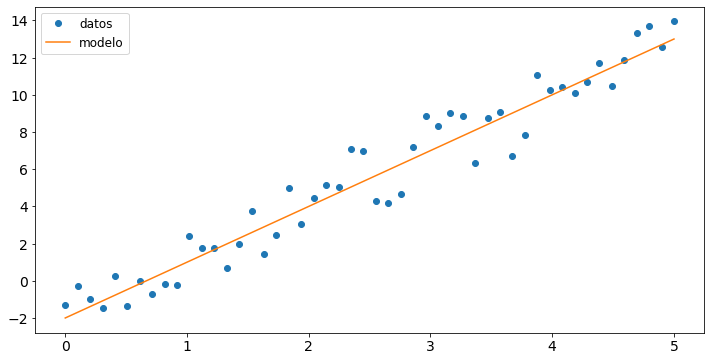

In [7]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.plot(x, f(x, par_a, par_b, 1), 'o', label='datos')
ax.plot(x, f(x, par_a, par_b, 0), label='modelo')
ax.legend()
fig.savefig('datos.png') 

In [70]:
from mytools import diag

Resolver el sistema:

In [20]:
y = f(x, par_a, par_b, 1)
A = np.column_stack((x, np.ones(N)))

In [21]:
At = A.transpose()
A_ = At@A
b_ = At@y

In [23]:
A_

array([[420.91836735, 125.        ],
       [125.        ,  50.        ]])

In [24]:
b_

array([1029.97832428,  280.75995255])

In [32]:
#M, par = diag(A, b)
r = np.linalg.solve(A_, b_)

In [28]:
# check:
A_ @ r - b_

array([0., 0.])

In [30]:
A_ @ r

array([1029.97832428,  280.75995255])

In [34]:
b

array([1029.97832428,  280.75995255])

In [35]:
r

array([ 3.02604117, -1.94990387])

In [36]:
par = r

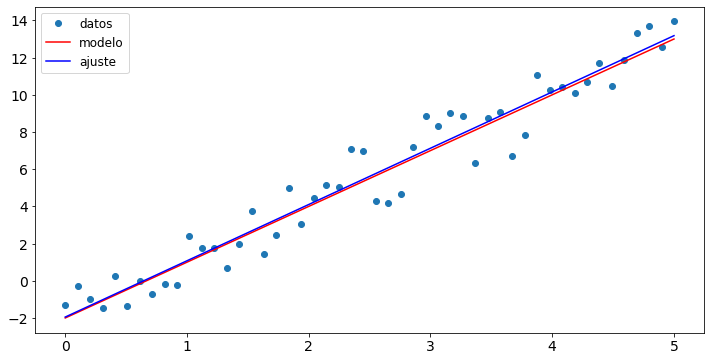

In [38]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
plt.plot(x, y, 'o', label='datos')
plt.plot(x, f(x, par_a, par_b, 0), color='red', label='modelo')
plt.plot(x, f(x, par[0], par[1], 0), 'blue', label='ajuste')
ax.legend()
fig.savefig('fit.png') 

Un modelo lineal no quiere decir que sea "una recta"...

In [39]:
def f(x, a, b, c, s):
    np.random.seed(223344)
    model = a + b*np.sin(3*x) + c*np.exp(x)
    noise = np.random.normal(loc=0, scale=s, size=len(x)) 
    return model + noise

In [64]:
N, par_a, par_b, par_c = 50, 3, 10, -0.5
x = np.linspace(0, 5, N)
s= 3

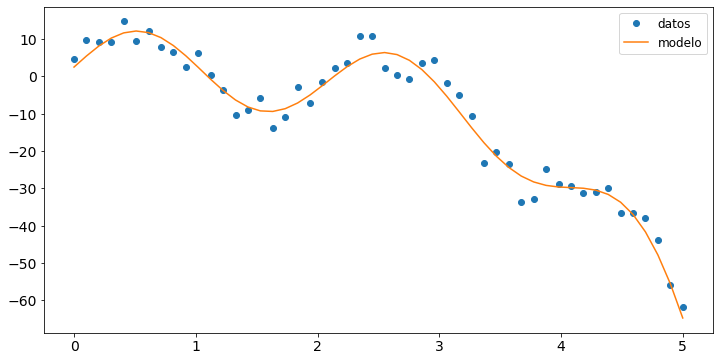

In [65]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot()
ax.plot(x, f(x, par_a, par_b, par_c, s), 'o', label='datos')
ax.plot(x, f(x, par_a, par_b, par_c, 0), label='modelo')
ax.legend()
fig.savefig('datos.png') 

El modelo es lineal, asi que ahora resolvemos la ecuación normal

In [66]:
y = f(x, par_a, par_b, par_c, s)
A = np.column_stack((np.ones(N), np.sin(3*x), np.exp(x)))

In [67]:
At = A.transpose()
A = At@A
b = At@y

In [68]:
#M, par = diag(A, b)
r = np.linalg.solve(A, b)

In [69]:
r

array([ 3.10689368, 10.54139813, -0.49429744])

In [70]:
# check:
print(A @ r - b)
print(r)

[ 3.41060513e-13 -4.97379915e-14  0.00000000e+00]
[ 3.10689368 10.54139813 -0.49429744]


In [71]:
print(f'parámetros del modelo: {par_a}, {par_b}, {par_c}')
print(f'parámetros del ajuste: {r[0]}, {r[1]}, {r[2]}')

parámetros del modelo: 3, 10, -0.5
parámetros del ajuste: 3.106893680897967, 10.541398133513463, -0.49429744447867197


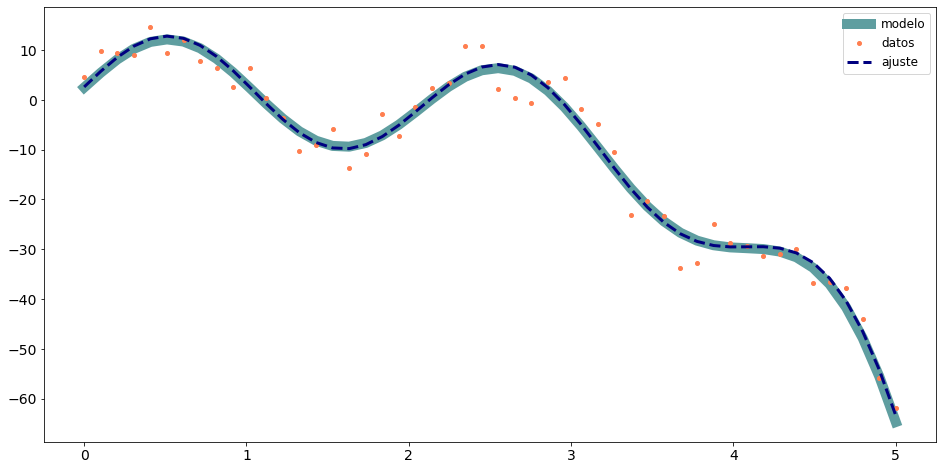

In [72]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()
ax.plot(x, f(x, par_a, par_b, par_c, 0), label='modelo', 
        linestyle='-', linewidth=10, color='cadetblue')
ax.plot(x, f(x, par_a, par_b, par_c, s), 'o', color='coral', 
        markersize=4, label='datos')
ax.plot(x, f(x, *r, 0), label='ajuste', linestyle='--', linewidth=3, color='navy')
ax.legend()
fig.savefig('datos.png')